1) Performed a simple linear regression using the OLS() function from the Statsmodels library, with mpg as the response variable and horsepower as the predictor. Generated and reviewed the model output using the summary() method.

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [186]:
#Read Auto.csv dataset
df = pd.read_csv("Auto.csv")

In [187]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [188]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [189]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [190]:
len(df.name.unique())

304

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [192]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna(subset=['horsepower'])

In [193]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [194]:
X = sm.add_constant(df['horsepower'])
model = sm.OLS(df['mpg'], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           7.03e-81
Time:                        15:32:56   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [195]:
residuals = results.resid
mse = (residuals ** 2).mean()
rse = mse**0.5
print(f"mean Standard Error (RSE):{mse:.2f}")
print(f"Residual Standard Error (RSE):{rse:.2f}")

mean Standard Error (RSE):23.94
Residual Standard Error (RSE):4.89


1.a.i) Is there a relationship between the predictor and the response?


Looking at the ols regression results we can say that there is a strong relationship between "horsepower" and "mpg". Since the coefficient associated with "horsepower" is -0.1578 and having a very low P-value(P>|t|=0.000, we can conclude that there is a significant and negative relationship between the "horsepower" of the vehicle and the fuel efficiency "mpg".

1.a.ii) How strong is the relationship between the predictor and the response? Focus on the RSE, estimated
R
2
, and slope.

Based on the results, observing the values of RSE, estimated R^2 and the slope we can predict the relationship between the variables:
* The relationship between "horsepower" and "mpg" is moderate to strong, as indicated by the R-squared value of 0.606 (60.6%). The higher the R-squared, more strong is the relationship between the predictor and response.
* The negative slope coefficient of -0.1578, implies the negative relationship. The magnitude of the slope implies the strength of the relationship between the predictor and the response.
* The RSE calculated from the model is approximately 4.89 which suggests a reasonably good fit to the data, with relatively small errors on average. Having lesser RSE indicates a better fit.





(1.a.iii) Is the relationship between the predictor and the response positive or negative?

As the slope coefficient is -0.1578 which is negative, indicates that the relationship between predictor and the response is negative.

(1.a.iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

In [196]:
hp_value = 98
exog = sm.add_constant([1, hp_value])
pred = results.get_prediction(exog=exog)
intervals = pred.conf_int(alpha=0.05)
pred_mpg = pred.predicted_mean[1]

print(f"Predicted mpg for horsepower = {hp_value}: {pred_mpg:.2f}")
print(f"95% Confidence Interval: ({intervals[0][0]:.2f}, {intervals[0][1]:.2f})")
print(f"95% Prediction Interval: ({intervals[1][0]:.2f}, {intervals[1][1]:.2f})")

Predicted mpg for horsepower = 98: 24.47
95% Confidence Interval: (38.38, 41.18)
95% Prediction Interval: (23.97, 24.96)


These intervals are useful for understanding the uncertainty associated with the predicted and observed values. The confidence interval is about the mean, while the prediction interval is about individual data points. The prediction interval is wider because it accounts for both the variability in the data and the uncertainty in the model.

1.a.vi) Used the fsolve function from SciPy to infer the horsepower value corresponding to the mpg prediction obtained in step (iv). The inversion confirmed consistency with the original regression model, showing that the computed horsepower value aligns with the model’s linear relationship between the two variables.

In [197]:
from scipy.optimize import fsolve
eq = lambda x: results.params['const'] + (results.params['horsepower']*x)-pred_mpg
pred_hp = fsolve(eq, x0=50)
print(f"Inferred horsepower for predicted mpg of {pred_mpg:.2f} : {pred_hp[0]:.2f}")

Inferred horsepower for predicted mpg of 24.47 : 98.00


Q1.b) Plotted mpg against horsepower and used seaborn’s lmplot() to render the least-squares regression line for visual confirmation of the linear trend.

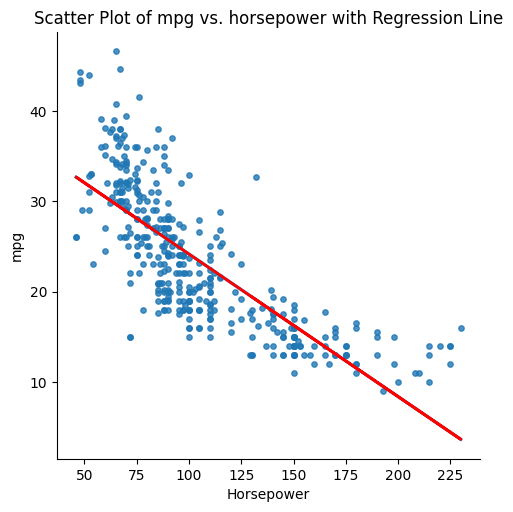

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='horsepower', y='mpg', data=df, ci=None, scatter_kws={"s": 15})
x_plot = df['horsepower']
y_plot = results.predict(exog=sm.add_constant(x_plot))
plt.plot(x_plot, y_plot, color='red', linewidth=2)
plt.title("Scatter Plot of mpg vs. horsepower with Regression Line")
plt.xlabel("Horsepower")
plt.ylabel("mpg")
plt.show()

1.c) Generated diagnostic plots using statsmodels’ plot_fit. Residual patterns indicated non-linearity and non-constant variance, showing that the simple linear model does not fully capture the relationship structure


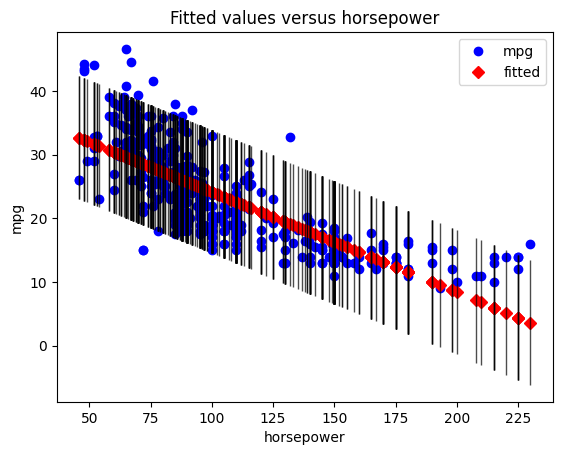

In [199]:
import statsmodels.api as sm
import statsmodels.graphics.regressionplots as sgr
fig = sgr.plot_fit(results,1)
plt.show()

Loaded the Auto dataset to perform multiple linear regression analyses for the subsequent tasks.

2.a) Created a scatterplot matrix of all variables in the dataset using seaborn’s pairplot() to visualize pairwise relationships and distribution patterns.

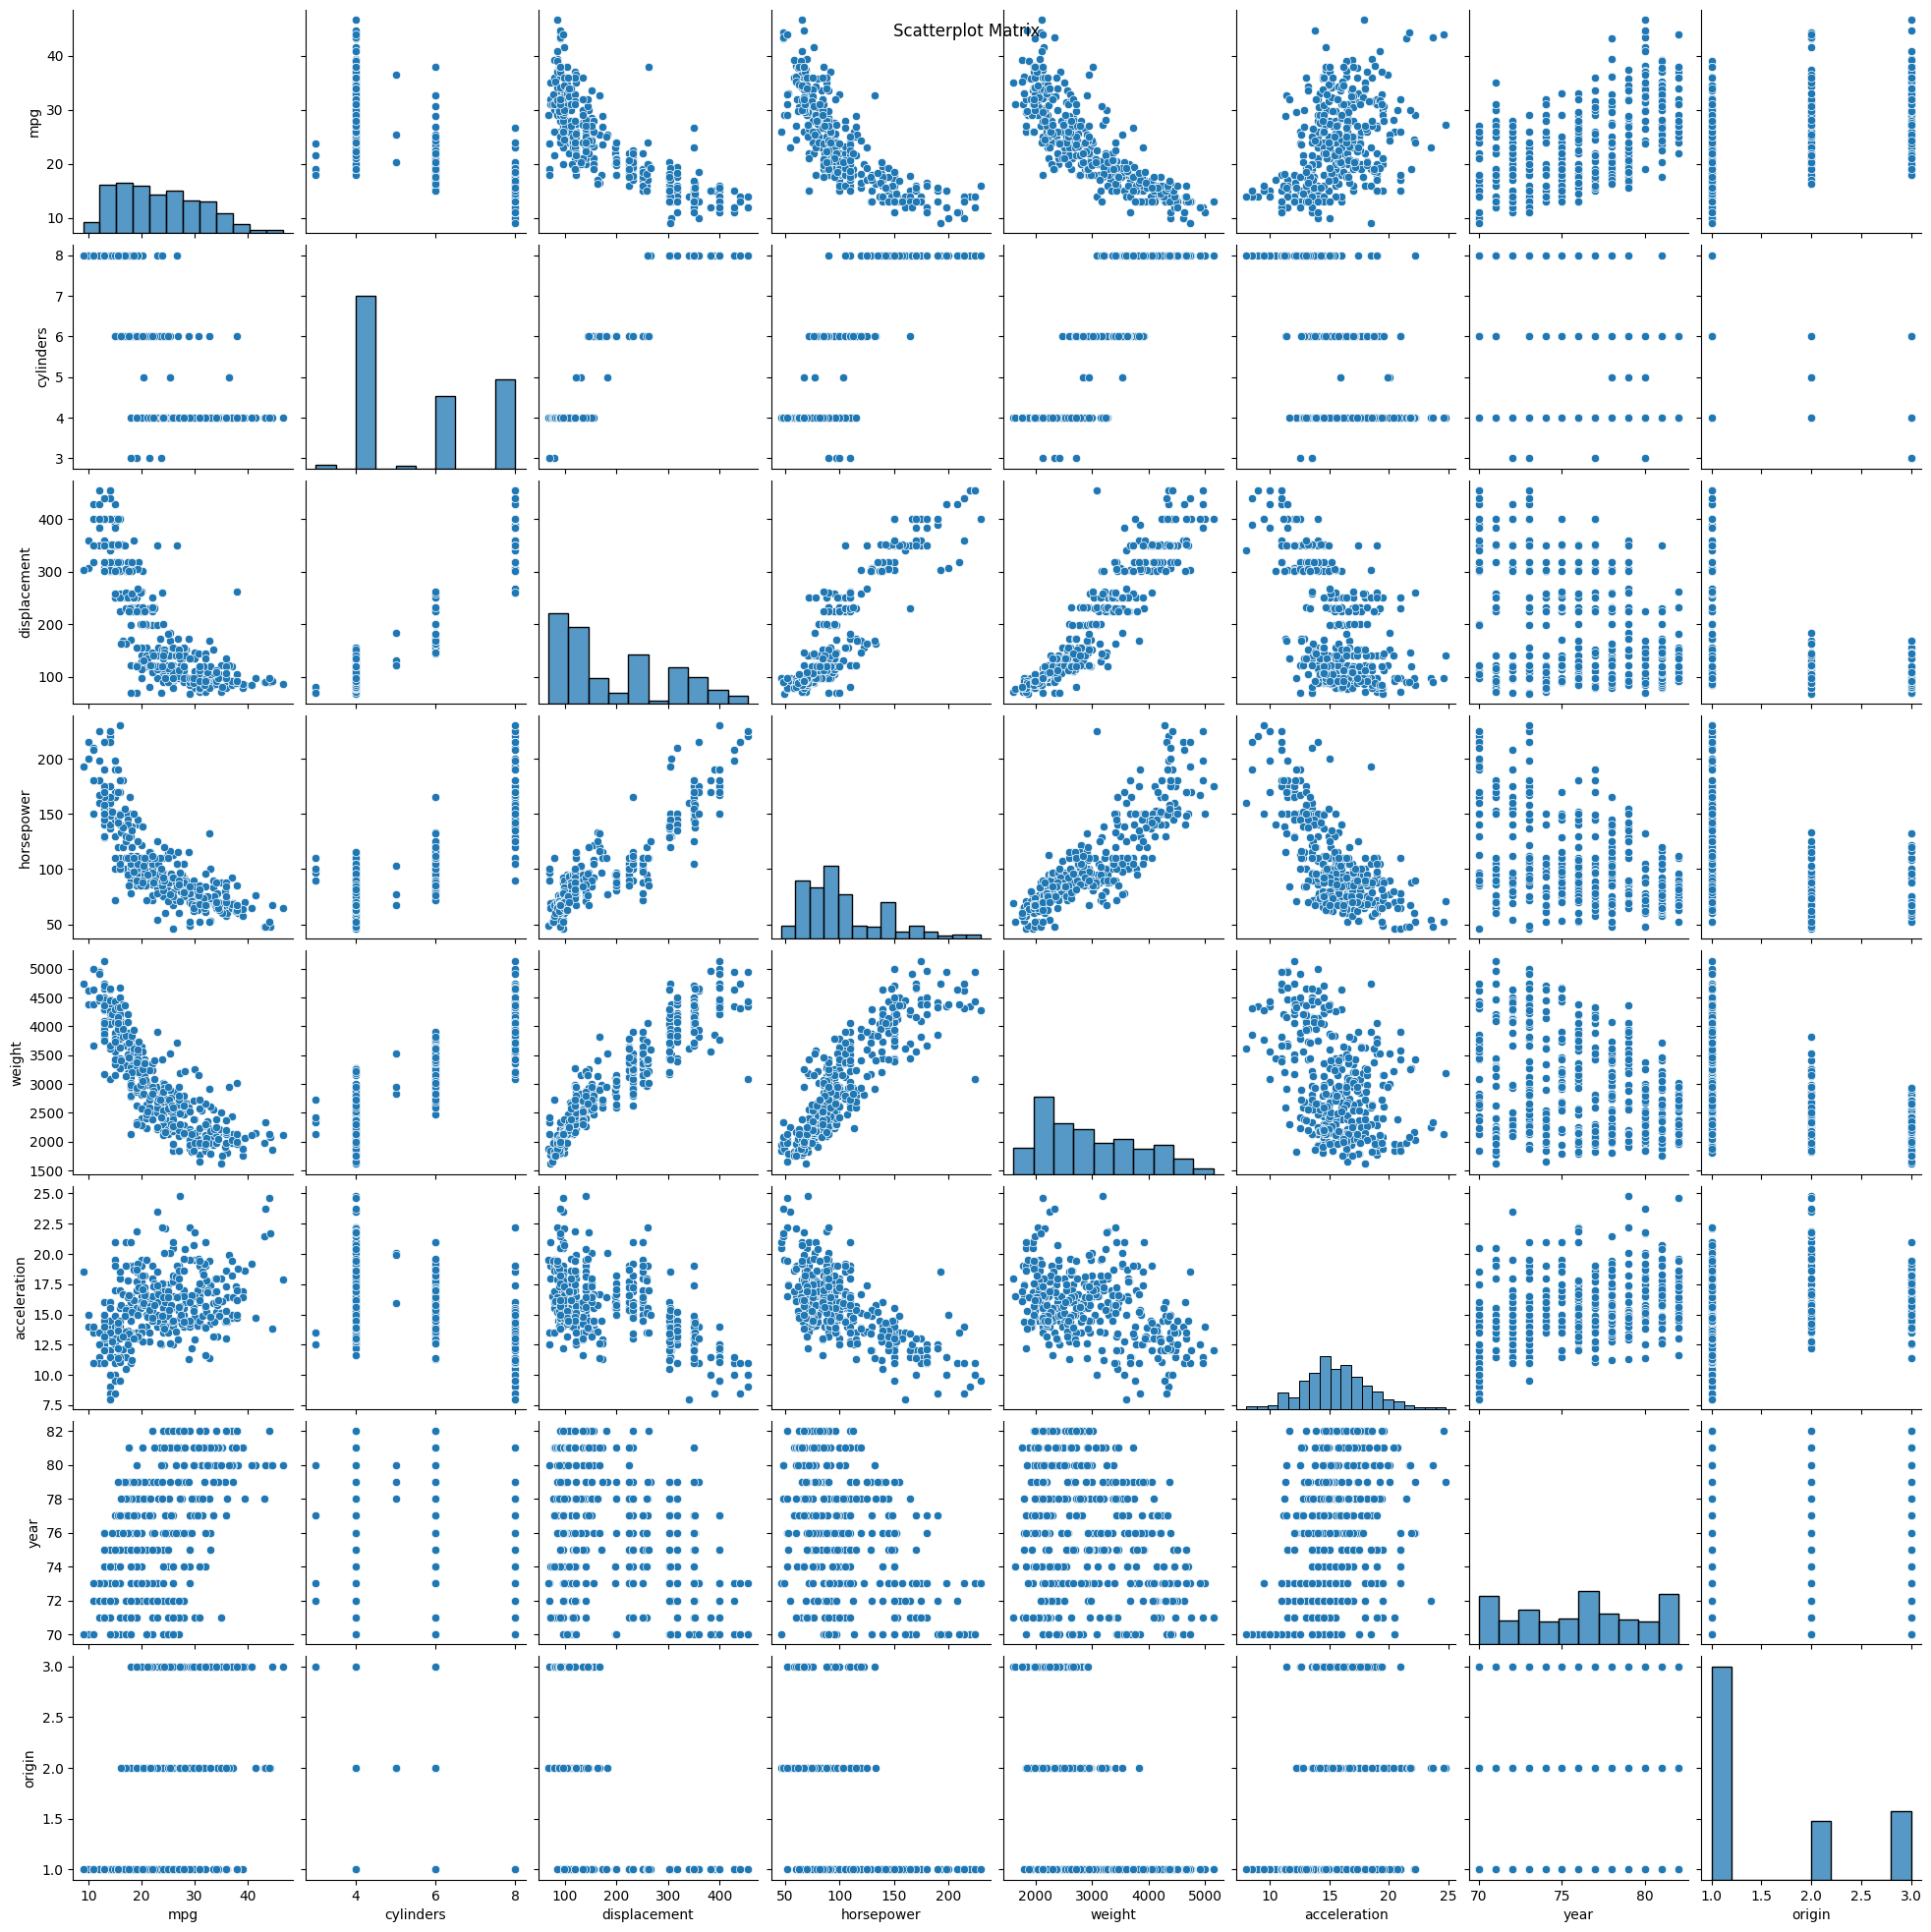

In [200]:
sns.pairplot(df)
plt.suptitle("Scatterplot Matrix")
plt.show()

2.b) Computed the full correlation matrix using pandas corr() and visualized it with seaborn’s heatmap to highlight linear associations across all variables.


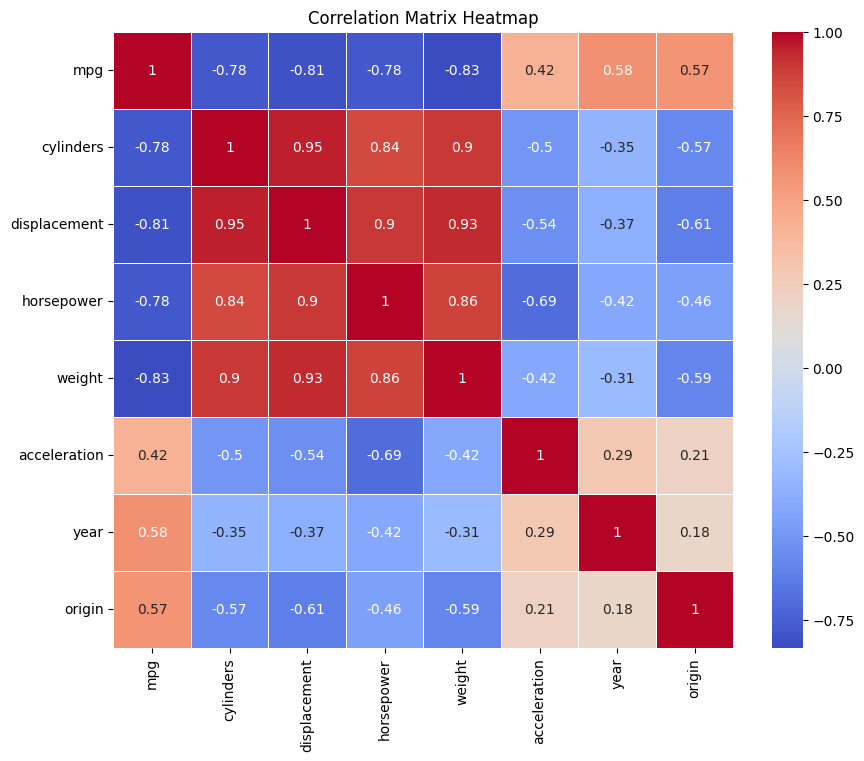

In [201]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

* Mpg is negatively high correlated to cylinders,displacement,horsepower and weight. Which tells us that if we need more fuel efficiency from the car, we need less cylinder and displacement.
* Cylinders is highly correlated to displacement,horsepower and weight. which tells us that if there are more number of cylinders, the car will be faster but will have more weight.
* Rest of the variables are moderately correlated with each other.

2.c) Performed a multiple linear regression using statsmodels’ ols(), modeling mpg as the response and all variables except name as predictors. Reviewed the full model output using summary() to evaluate coefficient estimates, significance levels, and overall model performance.


In [202]:
X = df.drop(columns=['mpg', 'name'])
X = sm.add_constant(X)
model = sm.OLS(df['mpg'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          2.04e-139
Time:                        15:33:17   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

2.c.i) Is there a significant association between the predictors and the response?


* The "displacement," "horsepower," "weight," "acceleration," "year," and "origin" predictors all have p-values less than 0.05. This indicates that these predictors are statistically significant and have a significant association with the response variable "mpg."
* The "cylinders" predictor has a p-value of 0.128, which is greater than the typical significance level of 0.05. This suggests that the "cylinders" predictor may not have a statistically significant association with the response variable.

2.c.ii) Identified the predictors with statistically significant coefficients in the regression output, indicating that these variables contribute meaningfully to explaining variation in mpg.

Significant predictors for "mpg" are "displacement," "weight," "year," and "origin" as p-values are greater than 0.05. "cylinders," "horsepower," and "acceleration" are not significant due to p-values less than 0.05.

2.c.iii) What does the coefficient for the year variable suggest?

The coefficient for the "year" variable suggests that, on average, as the model year of the vehicle increases by one unit, the miles per gallon (mpg) is expected to increase by approximately 0.7508 units. In simpler terms, newer vehicles tend to have better fuel efficiency.

2.d) Generated diagnostic plots using plot_fit() to assess model adequacy. The residual patterns indicated deviations from linear assumptions, including signs of non-linearity and non-constant variance. A small number of points showed unusually large residuals, and the leverage plot highlighted a few observations with notably high leverage.

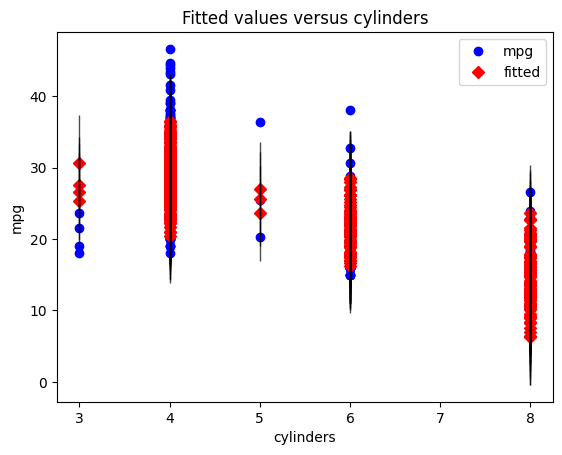

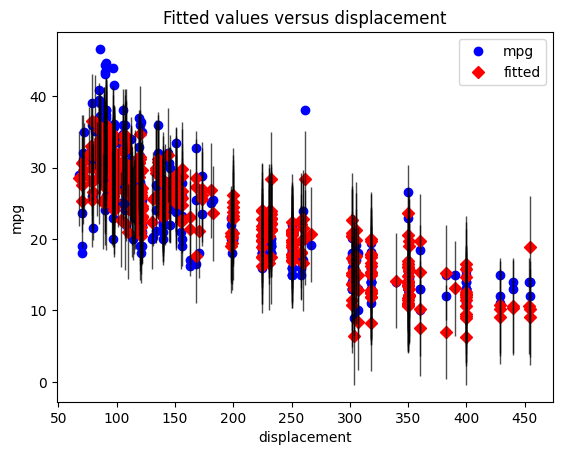

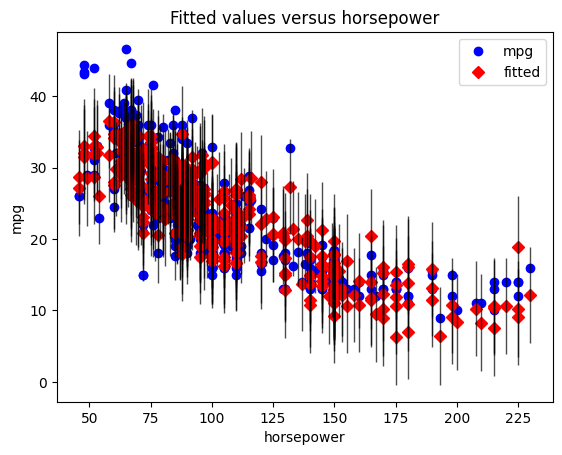

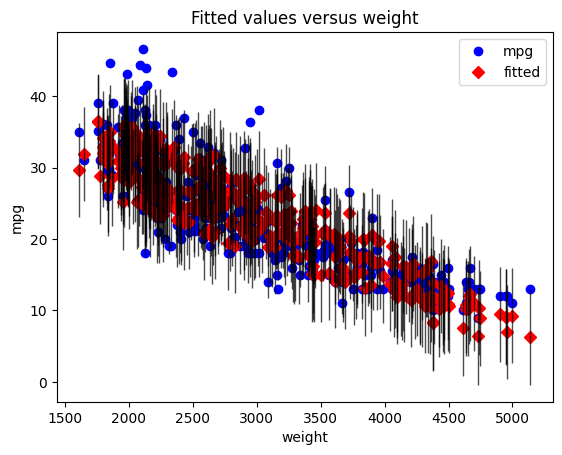

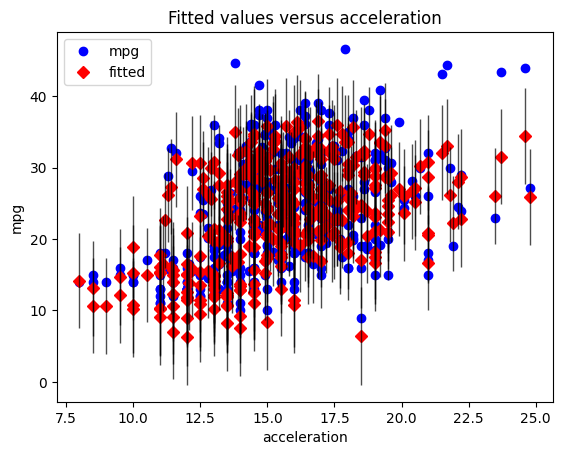

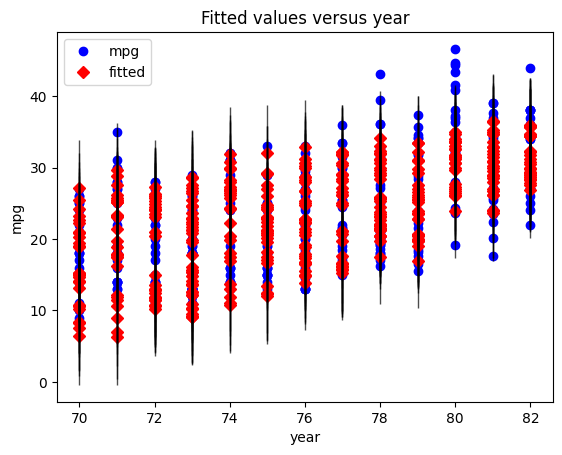

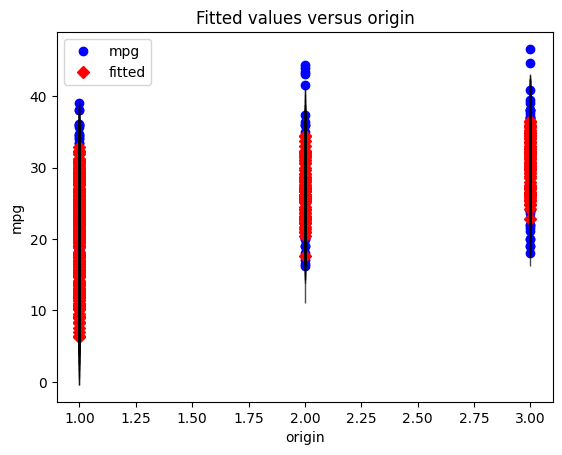

In [203]:
#using plot_fit()
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.graphics.regressionplots as plots
for i in range(1,8):
    plots.plot_fit(model,i)
    plt.show()

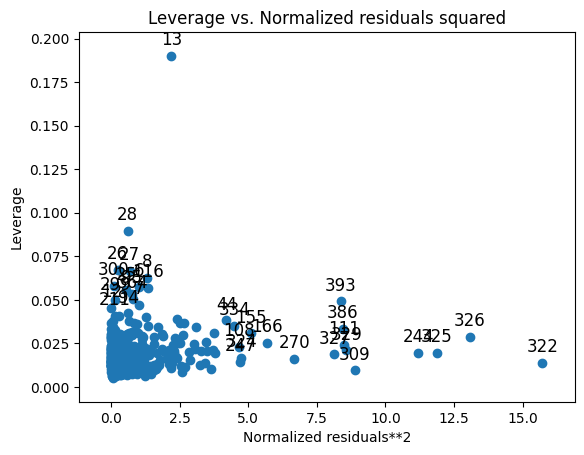

In [204]:
#Using plot_leverage_resid2
sm.graphics.plot_leverage_resid2(model)
plt.show()

2.e) Fitted multiple linear regression models that incorporated various interaction terms. Several of the examined interactions showed statistical significance, indicating that the effect of certain predictors on mpg varied depending on the levels of other predictors.

In [205]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + cylinders:displacement + cylinders:horsepower + cylinders:weight"
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     241.2
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          4.83e-158
Time:                        15:33:19   Log-Likelihood:                -970.71
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     381   BIC:                             2007.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 14

In [206]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula1 = "mpg ~ cylinders * displacement + weight + year"
model1 = smf.ols(formula=formula1, data=df).fit()
print("Model 1:")
print(model1.summary())

Model 1:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     391.2
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          1.21e-148
Time:                        15:33:19   Log-Likelihood:                -1007.8
No. Observations:                 392   AIC:                             2028.
Df Residuals:                     386   BIC:                             2052.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept          

In [207]:
formula2 = "mpg ~ cylinders * horsepower + weight + year"
model2 = smf.ols(formula=formula2, data=df).fit()
print("Model 2:")
print(model2.summary())

Model 2:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     456.3
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          1.53e-159
Time:                        15:33:20   Log-Likelihood:                -982.32
No. Observations:                 392   AIC:                             1977.
Df Residuals:                     386   BIC:                             2000.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              

2.f) Applied transformations such as logarithmic, square-root, and squared terms to selected predictors. Several transformed variants improved linearity and reduced residual structure, indicating that non-linear relationships were present and that transformed models provided better fit characteristics.

In [208]:
import statsmodels.formula.api as smf
model_log = smf.ols(formula="mpg ~ np.log(displacement) + weight", data=df).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     481.5
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          5.85e-106
Time:                        15:33:20   Log-Likelihood:                -1117.0
No. Observations:                 392   AIC:                             2240.
Df Residuals:                     389   BIC:                             2252.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               65.9789 

In [209]:
model_sqrt = smf.ols(formula="mpg ~ np.sqrt(weight) + cylinders", data=df).fit()
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     474.8
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          4.14e-105
Time:                        15:33:20   Log-Likelihood:                -1119.0
No. Observations:                 392   AIC:                             2244.
Df Residuals:                     389   BIC:                             2256.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          66.4404      2.113     

In [210]:
model_sqrt = smf.ols(formula="mpg ~ np.sqrt(weight) + cylinders", data=df).fit()
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     474.8
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          4.14e-105
Time:                        15:33:20   Log-Likelihood:                -1119.0
No. Observations:                 392   AIC:                             2244.
Df Residuals:                     389   BIC:                             2256.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          66.4404      2.113     

Simulated a dataset after setting the random seed to ensure reproducible results and fitted simple linear regression models to the generated values.

3.a) Generated a vector x of 100 observations sampled from a standard normal distribution to serve as the feature variable.

In [211]:
np.random.seed(1)
x = np.random.normal(loc=0, scale=1, size=100)

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]


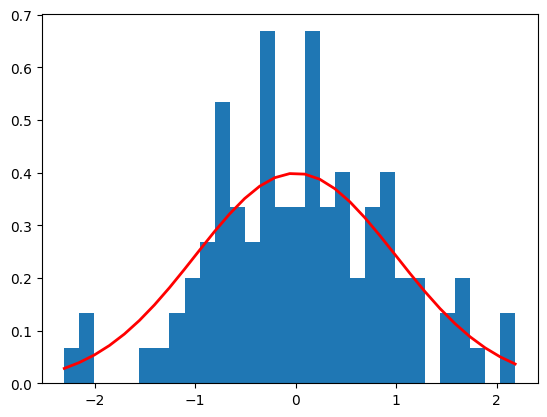

In [212]:
print(x[:5])
mu, sigma = 0, 1
count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

3.b) Generated a vector eps of 100 observations sampled from a normal distribution with mean 0 and variance 0.25.

In [213]:
import numpy as np
np.random.seed(1)
eps = np.random.normal(loc=0, scale=0.5, size=100)

[ 0.81217268 -0.30587821 -0.26408588 -0.53648431  0.43270381]


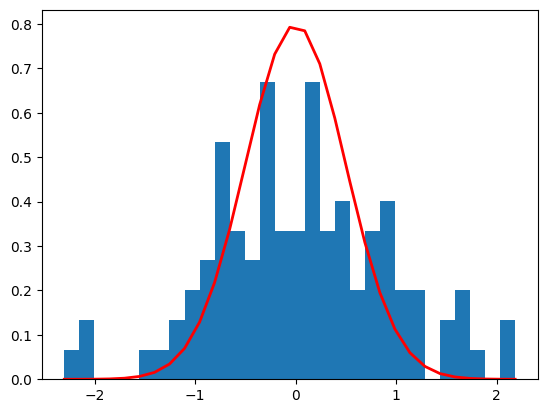

In [214]:
print(eps[:5])
mu, sigma = 0, 0.5
count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

3.c) Constructed y using the model (Y = -1 + 0.5X + \varepsilon). The resulting vector has length 100, with (\beta_0 = -1) and (\beta_1 = 0.5).


In [215]:
y = -1 + (0.5 * x) + eps
length_of_y = len(y)
beta0 = -1
beta1 = 0.5

print("Length of y:", length_of_y)
print("beta0:", beta0)
print("beta1:", beta1)

Length of y: 100
beta0: -1
beta1: 0.5


In [216]:
print(y[:5])

[ 0.62434536 -1.61175641 -1.52817175 -2.07296862 -0.13459237]


3.d) Plotted a scatterplot showing the relationship between x and y to visualize the linear trend and variability.

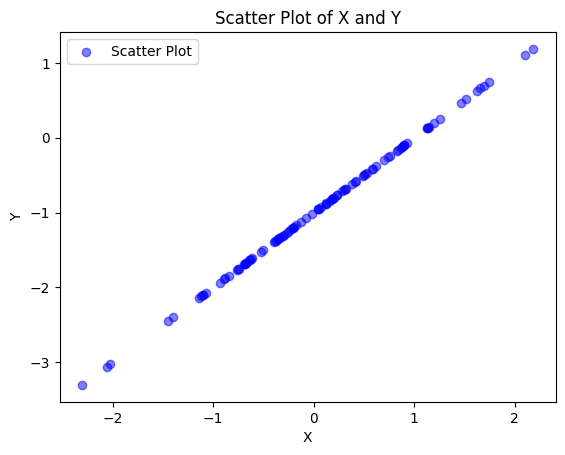

In [217]:
plt.scatter(x, y, label='Scatter Plot', color='b',alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.title('Scatter Plot of X and Y')
plt.show()

The true relationship betewen X and Y is linear.

3.e) Fitted a least squares linear regression model relating `y` to `x` and compared the estimated coefficients (intercept and slope) to the true values used to generate the data, noting their similarity and any deviations.


In [218]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.282e+33
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:33:20   Log-Likelihood:                 3452.7
No. Observations:                 100   AIC:                            -6901.
Df Residuals:                      98   BIC:                            -6896.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0000   2.48e-17  -4.04e+16      0.0

3.f) Added the estimated least squares regression line to the scatterplot from (3.d) using a distinct color to illustrate the fitted relationship between `x` and `y`.


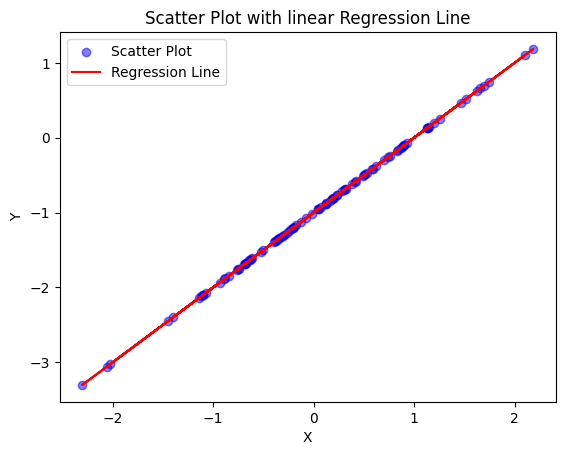

In [219]:
intercept, slope = model.params
plt.scatter(x, y, label='Scatter Plot', color='b', alpha=0.5)
plt.plot(x, intercept + slope * x, color='r', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.title('Scatter Plot with linear Regression Line')
plt.show()

The regression model is a perfect fit for the data.

**3.g) Fitted a polynomial regression model predicting `y` using `x` and `x²` and evaluated whether the quadratic term improves the model fit by comparing it to the simple linear model.**

In [220]:
X = sm.add_constant(np.column_stack((x, x**2)))
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.022e+32
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:33:21   Log-Likelihood:                 3361.5
No. Observations:                 100   AIC:                            -6717.
Df Residuals:                      97   BIC:                            -6709.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0000   7.58e-17  -1.32e+16      0.0

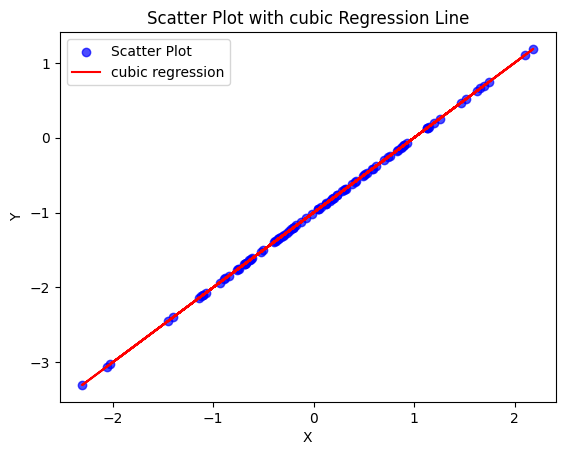

In [221]:
intercept, slope1, slope2 = model.params
plt.scatter(x, y, label='Scatter Plot', color='b', alpha=0.7)
plt.plot(x, intercept + slope1 * x + slope2 * x**2, color='r', label='cubic regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.title('Scatter Plot with cubic Regression Line')
plt.show()

The cubic regression is a perfect fit for the truly linear model.

**3.h) Repeated steps (3.a)–(3.f) using a modified data generation process with reduced noise by decreasing the variance of the error term `ϵ`, and described the resulting changes in the model and fitted line.**


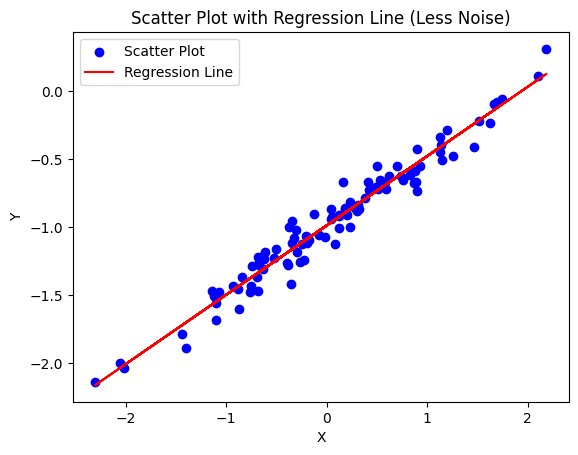

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2314.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           5.58e-70
Time:                        15:33:21   Log-Likelihood:                 95.820
No. Observations:                 100   AIC:                            -187.6
Df Residuals:                      98   BIC:                            -182.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9853      0.009   -104.844      0.0

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)
x = np.random.normal(loc=0, scale=1, size=100)
eps1 = np.random.normal(loc=0, scale=0.1, size=100)
y = -1 + 0.5 * x + eps1
X = sm.add_constant(x)
model_ln = sm.OLS(y, X).fit()
intercept, slope = model_ln.params
plt.scatter(x, y, label='Scatter Plot', color='b', alpha=1)
plt.plot(x, intercept + slope * x, color='r', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.title('Scatter Plot with Regression Line (Less Noise)')
plt.show()

print(model_ln.summary())

We can observe that by decreasing the scale of the eps, less noise is introduced in the data.

**3.i: Repeated steps (3.a)–(3.f) using a modified data generation process with increased noise by increasing the variance of the error term `ϵ`, and described the resulting impact on the model and fitted line.**

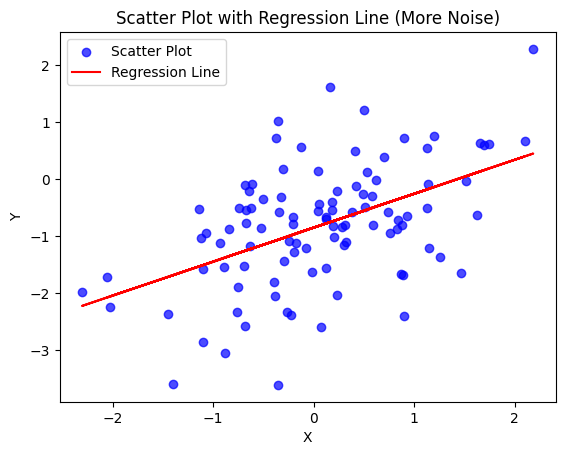

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.60
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.79e-07
Time:                        15:33:22   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8530      0.094     -9.076      0.0

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)
x = np.random.normal(loc=0, scale=1, size=100)
eps2 = np.random.normal(loc=0, scale=1.0, size=100)
y = -1 + 0.5 * x + eps2
X = sm.add_constant(x)
model_mn = sm.OLS(y, X).fit()
intercept, slope = model_mn.params
plt.scatter(x, y, label='Scatter Plot', color='b', alpha=0.7)
plt.plot(x, intercept + slope * x, color='r', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.title('Scatter Plot with Regression Line (More Noise)')
plt.show()

print(model_mn.summary())

*We can observe more noise in the data by increasing the scale in the eps*

**3.j) Computed the confidence intervals for (β_0) and (β_1) for the original, noisier, and less noisy data sets, and described how changes in noise affect the width and precision of these intervals.**


In [224]:
conf_interval_original = model.conf_int(alpha=0.05)
conf_interval_less = model_ln.conf_int(alpha=0.05)
conf_interval_more = model_mn.conf_int(alpha=0.05)

print("Original Data Set:")
print(f"β0 Confidence Interval: {conf_interval_original[0]}")
print(f"β1 Confidence Interval: {conf_interval_original[1]}")

print("\nLess Noisy Data Set:")
print(f"β0 Confidence Interval: {conf_interval_less[0]}")
print(f"β1 Confidence Interval: {conf_interval_less[1]}")

print("\nNoisier Data Set:")
print(f"β0 Confidence Interval: {conf_interval_more[0]}")
print(f"β1 Confidence Interval: {conf_interval_more[1]}")

Original Data Set:
β0 Confidence Interval: [-1. -1.]
β1 Confidence Interval: [1. 1.]

Less Noisy Data Set:
β0 Confidence Interval: [-1.00394819 -0.9666491 ]
β1 Confidence Interval: [0.48852268 0.53056275]

Noisier Data Set:
β0 Confidence Interval: [-1.03948193 -0.66649101]
β1 Confidence Interval: [0.38522675 0.80562751]


*The level of noise in the data can impact the width of confidence intervals, with noisier data leading to wider intervals.*



This section focuses on the collinearity problem.



**4.a) The following commands are performed in Python.**

In [225]:
import numpy as np
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

The last line corresponds to creating a linear model in which
y
 is a function of
x
1
 and
x
2
. Write out the form of the linear model. What are the regression coefficients?

Linear model can be written as:

y=β0+β1⋅x1+β2⋅x2+ϵ

The regression coefficients are beta_0 = 2, beta_1 = 2, and beta_2 = 0.3 in this linear model.

**Q4.b) Calculated the correlation between `x₁` and `x₂` and created a scatterplot to visualize their relationship.**


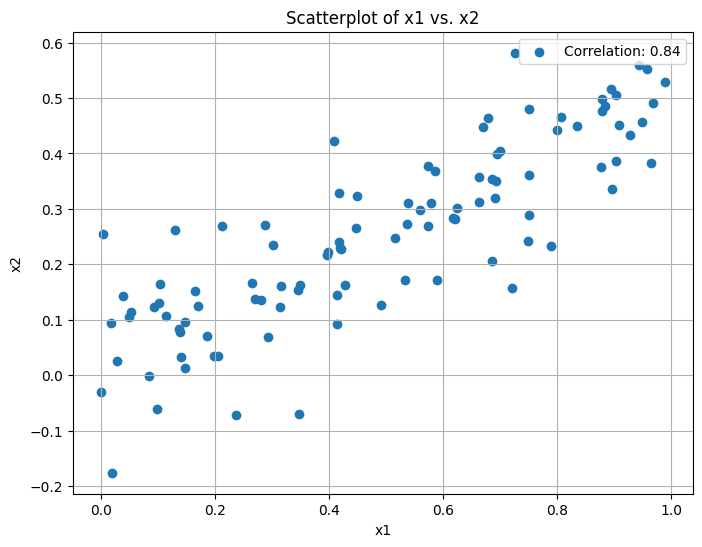

Correlation between x1 and x2: 0.84


In [226]:
correlation = np.corrcoef(x1, x2)[0, 1]
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, label=f'Correlation: {correlation:.2f}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot of x1 vs. x2')
plt.legend()
plt.grid()
plt.show()

print(f"Correlation between x1 and x2: {correlation:.2f}")

**4.c) Fitted a least squares regression model predicting `y` using `x₁` and `x₂`, reported the estimated coefficients (β_0), (β_1), and (β_2), compared them to the true values, and assessed whether the null hypotheses (H_0: β_1 = 0) and (H_0: β_2 = 0) could be rejected.**


In [227]:
X = sm.add_constant(np.column_stack((x1, x2)))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           4.40e-07
Time:                        15:33:22   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.0

* The estimated β0(2.1893), is close to the true intercept indicating that the model is reasonably accurate in estimating the intercept.
* The estimated β1(0.7046) is different from the true β1. his suggests that the model underestimates the effect of x1 on y.
* The estimated β2(2.5024) is close to β2 indicating that the model is reasonably accurate in estimating the effect on x1 on y.

Null Hypothesis:
* p-value for β1 is 0.271, which is greater than the typical significance level of 0.05. Therefore, you fail to reject the null hypothesis, suggesting that there is not enough evidence to conclude that x1 has a significant linear relationship with y.
* p-value for β2 is 0.031, which is which is less than 0.05. Therefore, you reject the null hypothesis, indicating that there is enough evidence to conclude that x2 has a significant linear relationship with y.



**4.d) Fitted a least squares regression model predicting `y` using only `x₁`, reported the estimated coefficient (β_1), and evaluated whether the null hypothesis (H_0: β_1 = 0) could be rejected.**


In [228]:
X_single = sm.add_constant(x1)
model_single1 = sm.OLS(y, X_single).fit()
print(model_single1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           6.68e-07
Time:                        15:33:22   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.0

*Yes, the null hypothesis can be rejected H0 : β1 = 0. The p-value for β1 is 0.000, which is less than the typical significance level of 0.05. This indicates that there is enough statistical evidence to conclude that x1 has a significant linear relationship with y.*

**4.e) Fitted a least squares regression model predicting `y` using only `x₂`, reported the estimated coefficient (β_2), and assessed whether the null hypothesis (H_0: β_2 = 0) could be rejected.**


In [229]:
X_single = sm.add_constant(x2)
model_single2 = sm.OLS(y, X_single).fit()
print(model_single2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.09e-07
Time:                        15:33:22   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.0

*Yes, the null hypothesis can be rejected H0 : β1 = 0. The p-value for β1 is 0.000, which is less than the typical significance level of 0.05. This indicates that there is enough statistical evidence to conclude that x1 has a significant linear relationship with y.*

**4.f) Compared the results from (4.c)–(4.e) to evaluate consistency between the full and single-predictor models, and described any apparent contradictions.**


The results in (4.c) to (4.e) do not contradict each other. They reflect variations in data quality and multicolinearity. Multicollinearity doesn't contradict the regression model but creates challenges. It leads to unstable coefficients, less precise estimates, and difficulties in interpreting variable effects due to high correlations between predictors. Addressing multicollinearity is essential for more reliable regression results.

**4.g) Added one mismeasured observation and re-fitted the linear models from (4.c)–(4.e), then evaluated its effect on each model and identified whether the observation acts as an outlier, a high-leverage point, or both.**

Adding a mismeasured observation to each of the linear models has the following effects:

1. Outlier: In each model, the mismeasured observation can be considered an outlier. An outlier is a data point that significantly deviates from the overall pattern of the data. The mismeasured observation disrupts the linear relationship observed in the original data.

2. High-Leverage Point: The mismeasured observation can also be considered a high-leverage point. High-leverage points have extreme values for the predictors, which can strongly influence the regression model. The new observation, if far from the mean of the predictors, exerts leverage on the estimated coefficients.

3. Model Effects: The inclusion of the mismeasured observation affects the coefficients and overall fit of the models. The coefficients are influenced by the extreme values of the new observation, making them less representative of the original data. The overall fit of the models is also impacted, and the new observation can potentially change the model's predictions.

In summary, the mismeasured observation can be considered both an outlier and a high-leverage point, as it deviates from the original data and significantly influences the regression models.

**5) Generated synthetic data and demonstrated that in simple linear regression of `Y` on `X`, the (R^2) statistic equals the square of the correlation between `X` and `Y`.**

Correlation between X and Y: 0.77162
R-squared (coefficient of determination): 0.59540


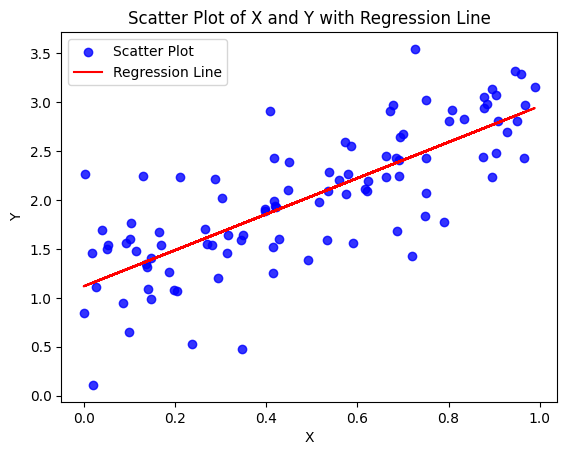

In [230]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100)
Y = 2 * X + 1 + np.random.normal(0, 0.5, 100)
correlation = np.corrcoef(X, Y)[0, 1]
r_squared = correlation**2
coefficients = np.polyfit(X, Y, 1)
print(f"Correlation between X and Y: {correlation:.5f}")
print(f"R-squared (coefficient of determination): {r_squared:.5f}")

plt.scatter(X, Y, label='Scatter Plot', color='b', alpha=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X, coefficients[0] * X + coefficients[1], color='r', label='Regression Line')
plt.title('Scatter Plot of X and Y with Regression Line')
plt.legend(loc='best')
plt.show()